# Proyek Prediksi Harga Rumah: [California Housing Prices]
- **Nama:** [Maulidhan Ady Nugraha]
- **Email:** [maulidhan6@gmail.com]
- **ID Dicoding:** [maulidhanadynugraha]

## Import Packages/Library

import seluruh library yang digunakan

In [ ]:
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from IPython.display import HTML

import pandas as pd
import numpy as np

### Link Data

link data yang saya gunakan adalah sebagai berikut (opensource)

In [ ]:
# Buat link
HTML('<a href="https://www.kaggle.com/datasets/camnugent/california-housing-prices" target="_blank">California Housing Prices</a>')

## Data Preparation

### Data Loading

proses uploud data ke colab

In [ ]:
uploaded = files.upload()

Saving housing.csv to housing (1).csv


menampilkan data yang telah diupload

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Data Preprocessing

menampilkan seluruh informasi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


menampilkan jumlah data yang kosong

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


menampilkan data yang kosong pada kolom total bedrooms

In [ ]:
df[(df.isnull()).any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


menghapus data yang kosong

In [ ]:
df.dropna(inplace=True)

mengecek kembali jumlah data yang kosong

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


mengecek kembali informasi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


menegecek kategori yang ada pada kolom ocean_proximity untuk diubah menjadi boolean

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

mengubah kategori tersebut menjadi boolean, menggunkan onehot encoding

In [ ]:
# Encoding Fitur Kategori
df = pd.concat([df, pd.get_dummies(df["ocean_proximity"], prefix="ocean_proximity")], axis=1)
df.drop(["ocean_proximity"], axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


#### Split Dataset

melakukan split pada pada kolom yang digunakan yaitu kolom median_house_value

In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']  # Target yang ingin diprediksi

membaginya menjadi ukuran 80% untuk data training dan 20% untuk data test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mengecek ukuran setiap data

In [ ]:
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (16346, 13), (16346,)
Testing data: (4087, 13), (4087,)


menampilkan data yang telah dihapus (sudah tidak ada)

In [ ]:
df.head(291)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-122.18,37.78,43.0,1985.0,440.0,1085.0,407.0,3.4205,136700.0,False,False,False,True,False
287,-122.18,37.78,50.0,1642.0,322.0,713.0,284.0,3.2984,160700.0,False,False,False,True,False
288,-122.17,37.78,49.0,893.0,177.0,468.0,181.0,3.8750,140600.0,False,False,False,True,False
289,-122.17,37.78,52.0,653.0,128.0,296.0,121.0,4.1750,144000.0,False,False,False,True,False


menampilkan y_train

In [ ]:
y_train

,median_house_value
17727,227600.0
2057,110400.0
6453,248100.0
4619,305600.0
15266,214600.0
...,...
11397,273400.0
12081,160800.0
5447,335400.0
866,231200.0


menampilkan data

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


## Modelling

Parameter yang digunakan adalah epochs=20, batch_size=32

In [ ]:
epochs =20
batch_size = 32

### LSTM

modelling menggunakan LSTM

In [ ]:

# Data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1,  activation='linear'))
model.compile(optimizer='adam', loss='mse')

# Train the model
model_lstm=model.fit(X_train_reshaped, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
y_pred = model.predict(X_test_reshaped)


# Evaluate the model
mse_lstm = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error: {mse_lstm}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0710
Epoch 2/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0216
Epoch 3/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0209
Epoch 4/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0196
Epoch 5/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0188
Epoch 6/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0178
Epoch 7/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0176
Epoch 8/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0173
Epoch 9/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0174
Epoch 10/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0163
Epoch 11/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0157
Epoch 12/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0161
Epoch 13/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0158
Epoch 14/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0163
Epoch 15/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0162


### GRU

Moddellling menggunakan GRU

In [ ]:
# Data scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))


# Reshape data for GRU (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the GRU model

model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(1)) # Linear activation for regression
model.compile(optimizer='adam', loss='mse')

# Train the model
model_gru=model.fit(X_train_reshaped, y_train_scaled, epochs=epochs, batch_size=batch_size, verbose=1)

# Make predictions
y_pred = model.predict(X_test_reshaped)



# Evaluate the model
mse_gru = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error: {mse_gru}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0484
Epoch 2/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0208
Epoch 3/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0200
Epoch 4/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0182
Epoch 5/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0186
Epoch 6/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0178
Epoch 7/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0176
Epoch 8/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0172
Epoch 9/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0166
Epoch 10/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0168
Epoch 11/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0170
Epoch 12/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0163
Epoch 13/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0157
Epoch 14/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0155
Epoch 15/20
511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0155


## Evaluasi dan Visualisasi

Menampilkan hasil perbandingan dari prosses training

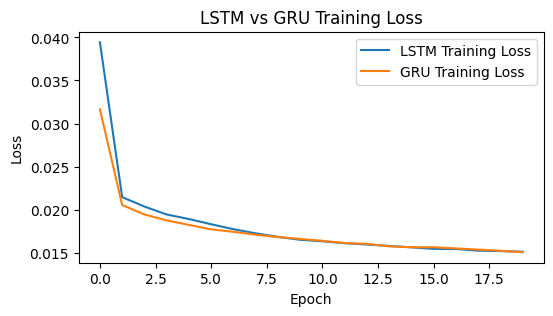

Last LSTM Loss: 0.015104097314178944
Last GRU Loss: 0.015049959532916546


In [ ]:
import matplotlib.pyplot as plt

# Training history for LSTM
history_lstm = model_lstm

# Training history for GRU
history_gru = model_gru

# Plot both LSTM and GRU training loss on the same plot
plt.figure(figsize=(6, 3))
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_gru.history['loss'], label='GRU Training Loss')
plt.title('LSTM vs GRU Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f"Last LSTM Loss: {history_lstm.history['loss'][-1]}")
print(f"Last GRU Loss: {history_gru.history['loss'][-1]}")

Menampikan hasil perbandingan MSE

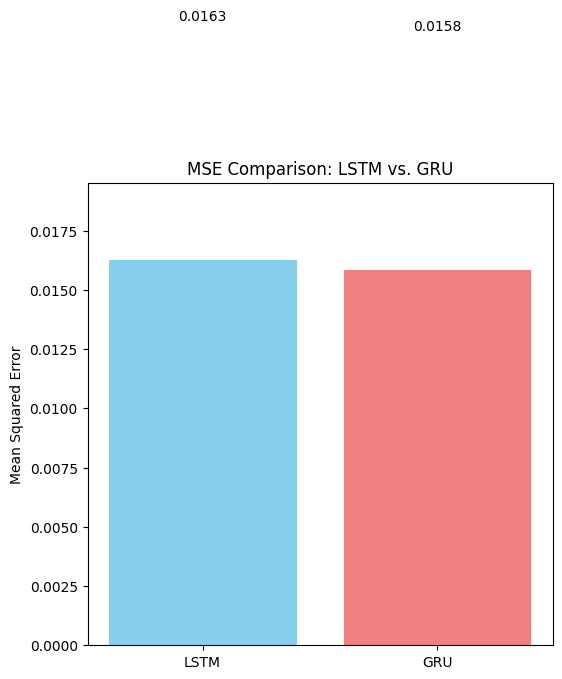

MSE LSTM: 0.016257672013816633
MSE GRU: 0.015844587482179588


In [ ]:
# Bar plot for MSE comparison
plt.figure(figsize=(6, 6))
plt.bar(['LSTM', 'GRU'], [mse_lstm, mse_gru], color=['skyblue', 'lightcoral'])
plt.title('MSE Comparison: LSTM vs. GRU')
plt.ylabel('Mean Squared Error')
plt.ylim(0, max(mse_lstm, mse_gru) * 1.2)
for i, v in enumerate([mse_lstm, mse_gru]):
    plt.text(i, v + 0.01, str(round(v, 4)), ha='center', va='bottom')
plt.show()
print(f"MSE LSTM: {mse_lstm}")
print(f"MSE GRU: {mse_gru}")